# Implementasi Convulational Neural Network Pada Pengenalan Tulisan Tangan Aksara Sunda

_**Ridho (1610631170181) - Universitas Singaperbangsa Karawang**_

Notebook ini merupakan demo dari proses pengenalan aksara sunda menggunakan convolutional neural network.

In [1]:
import glob
import numpy as np
import pandas as pd 
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Preproccesing

Tahap ini mengubah data gambar kedalam bentuk array serta melakukan resize dan normalisasi

In [3]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [4]:
x_train, y_train = prepare_dataset('train/')

In [5]:
x_test, y_test = prepare_dataset('test/')

Data Augmetation yang digunakan

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_train, augment=True)
data_test = datagen.flow(x_train, y_train, batch_size=5)

Using TensorFlow backend.


In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

def modelline():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(18, activation='softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelline().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 48)        38448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2408704   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [8]:
model_aug = modelline()
model_without = modelline()

In [9]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [10]:
history = model_without.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[es])

Train on 3780 samples, validate on 1620 samples
Epoch 1/50
3780/3780 [==============================] - 25s 7ms/step - loss: 2.8910 - acc: 0.0643 - val_loss: 2.8591 - val_acc: 0.0796
Epoch 2/50
3780/3780 [==============================] - 11s 3ms/step - loss: 2.6845 - acc: 0.1765 - val_loss: 2.4713 - val_acc: 0.2216
Epoch 3/50
3780/3780 [==============================] - 11s 3ms/step - loss: 2.1587 - acc: 0.3484 - val_loss: 2.0767 - val_acc: 0.3475
Epoch 4/50
3780/3780 [==============================] - 11s 3ms/step - loss: 1.8253 - acc: 0.4534 - val_loss: 1.7833 - val_acc: 0.4432
Epoch 5/50
3780/3780 [==============================] - 11s 3ms/step - loss: 1.5822 - acc: 0.5167 - val_loss: 1.5587 - val_acc: 0.5056
Epoch 6/50
3780/3780 [==============================] - 11s 3ms/step - loss: 1.3917 - acc: 0.5743 - val_loss: 1.4041 - val_acc: 0.5648
Epoch 7/50
3780/3780 [==============================] - 11s 3ms/step - loss: 1.2186 - acc: 0.6357 - val_loss: 1.2548 - val_acc: 0.6302
Epoch 8

In [11]:
history_Aug = model_aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=50,callbacks=[es])

Epoch 1/50
756/756 [==============================] - 35s 46ms/step - loss: 2.8520 - acc: 0.0849 - val_loss: 2.5436 - val_acc: 0.1957
Epoch 2/50
756/756 [==============================] - 34s 46ms/step - loss: 2.3792 - acc: 0.2577 - val_loss: 1.5551 - val_acc: 0.5407
Epoch 3/50
756/756 [==============================] - 35s 46ms/step - loss: 1.7489 - acc: 0.4601 - val_loss: 1.0254 - val_acc: 0.6636
Epoch 4/50
756/756 [==============================] - 35s 46ms/step - loss: 1.2196 - acc: 0.6310 - val_loss: 0.6987 - val_acc: 0.7673
Epoch 5/50
756/756 [==============================] - 34s 46ms/step - loss: 0.8985 - acc: 0.7241 - val_loss: 0.3771 - val_acc: 0.8988
Epoch 6/50
756/756 [==============================] - 34s 46ms/step - loss: 0.7186 - acc: 0.7831 - val_loss: 0.3207 - val_acc: 0.9043
Epoch 7/50
756/756 [==============================] - 35s 46ms/step - loss: 0.6096 - acc: 0.8148 - val_loss: 0.2491 - val_acc: 0.9235
Epoch 8/50
756/756 [==============================] - 35s 46ms

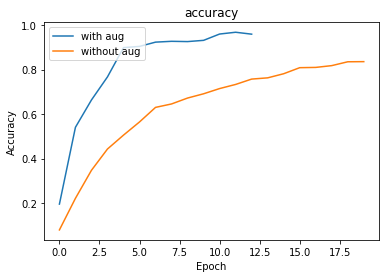

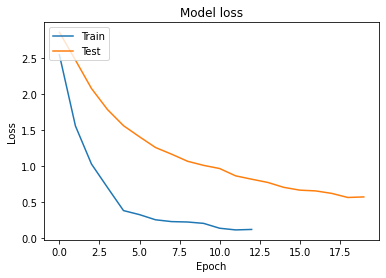

In [12]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Aug.history['val_acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug','train with aug', 'train without aug'], loc='upper left')
plt.show()

plt.plot(history_Aug.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [14]:
pred_img = pred_dataset('pred/aPredic/')
pred_img.shape

(270, 64, 64, 3)

In [15]:
def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

C:\Users\ridho\.conda\envs\skripsi\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


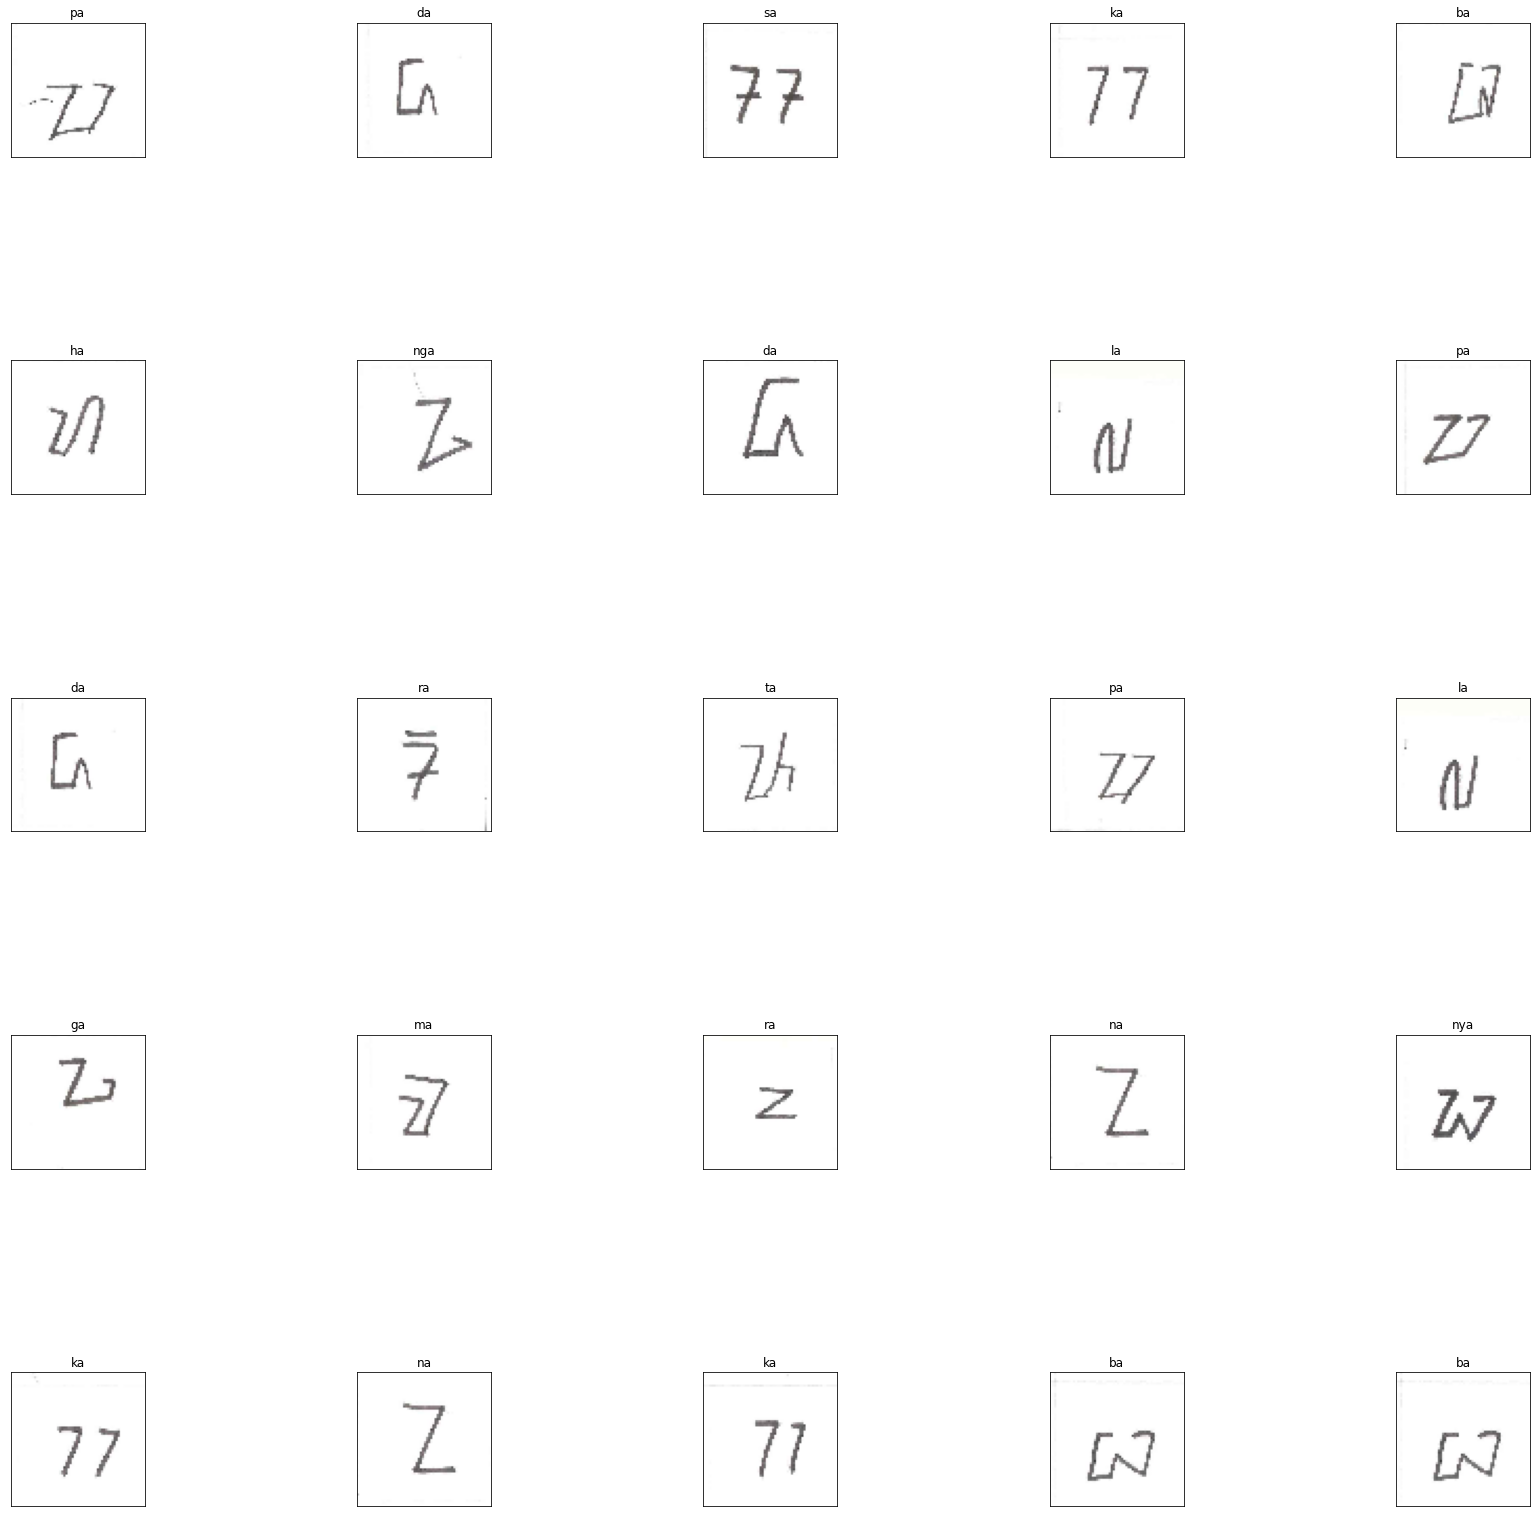

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(model_aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

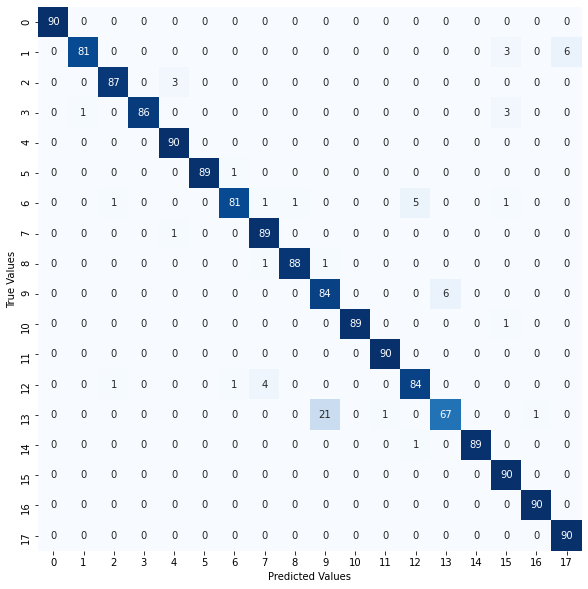

In [117]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model_aug.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) 

mat = confusion_matrix(y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

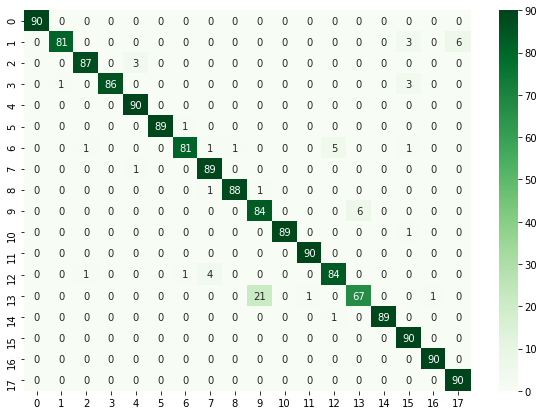

In [111]:
label = np.arange(0,18)
get_classlabel
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")

In [103]:
a = np.arange(1,12)

In [104]:
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11]
